In [37]:
from netCDF4 import Dataset
import geopandas as gpd
import xarray as xr
import netCDF4
import os
os.chdir(r"D:\All project data")
#import xray
urls=["ds1p1970-2001-30100.nc","ds2p1970-2001-30100.nc","ds3p1970-2001-30100.nc","ds5p1970-2001-30100.nc"]
data = [xr.open_dataset(url) for url in urls]

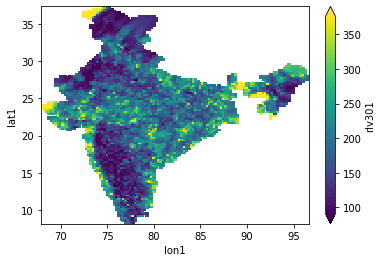

In [38]:
data[0]['rlv301'].plot(robust=True)
plt.show()

In [39]:
rl301 = data[0]['rlv301']
rl302 = data[1]['rlv301']
rl303 = data[2]['rlv301']
rl305 = data[3]['rlv301']


In [26]:
rl301

<xarray.DataArray 'rlv301' (lat1: 117, lon1: 115)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat1     (lat1) float64 8.25 8.5 8.75 9.0 9.25 ... 36.5 36.75 37.0 37.25
  * lon1     (lon1) float64 68.0 68.25 68.5 68.75 69.0 ... 95.75 96.0 96.25 96.5

In [40]:
#guj lat lon district
latd=[24,24.34,23.52,23.42,23.84,23.21,23.03,22.43,22.18,22.17,21.37,21.31,21.36,21.46,22.32,22.45,22.80,22.53,22.00,21.87,21.41,21.26,20.82,21.07,20.59]
lond=[70,71.76,72.10,72.37,72.99,72.63,72.40,71.43,70.56,70.07,69.49,70.36,71.15,72.11,73.00,72.45,73.55,74.19,73.16,73.55,73.01,72.99,73.70,73.40,72.93]

In [41]:
import numpy as np

import geopandas as gpd
from shapely.geometry import Point
import matplotlib.path as mpltPath
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

cube1=rl301


lats=data[0].lat1.values
lons=data[0].lon1.values


[lon2d,lat2d]=np.meshgrid(lons,lats)


points=[]

for latit in range(117):
    for lonit in range(115):
        point=(lon2d[latit,lonit],lat2d[latit,lonit])
        points.append(point)

points=np.array(points)

fld1=np.squeeze(cube1.data)

mask1 =np.zeros_like(fld1)

Canada=gpd.read_file(r"C:\Users\Pranjali\Downloads\maps-master\maps-master\States\Admin2.shp")
BritishColumbia=Canada[Canada['ST_NM'] == 'Gujarat']

def explode_polygon(indata):
    indf = indata
    outdf = gpd.GeoDataFrame(columns=indf.columns)
    for idx, row in indf.iterrows():
        if type(row.geometry) == Polygon:

            outdf = outdf.append(row,ignore_index=True)
        if type(row.geometry) == MultiPolygon:
            multdf = gpd.GeoDataFrame(columns=indf.columns)
            recs = len(row.geometry)
            multdf = multdf.append([row]*recs,ignore_index=True)
            for geom in range(recs):
                multdf.loc[geom,'geometry'] = row.geometry[geom]
            outdf = outdf.append(multdf,ignore_index=True)
    return outdf


EBritishColumbia=explode_polygon(BritishColumbia)



for index,row in EBritishColumbia.iterrows():

   
    mypolygon=[]
    for pt in list(row['geometry'].exterior.coords):
      
        mypolygon.append(pt)


    path=mpltPath.Path(mypolygon)
    inside=path.contains_points(points)

    inside=np.array(inside).reshape(lon2d.shape)
    i=np.where(inside == True)
    mask1[i]=1
i=np.where(mask1 == 0)
fld1[i]=np.nan


In [34]:
Canada

,ST_NM,geometry
0,Andaman & Nicobar Island,(POLYGON ((93.71975948121514 7.207067636262479...
1,Arunanchal Pradesh,"POLYGON ((96.16260946675357 29.38078474502004,..."
2,Assam,"(POLYGON ((89.74322932956994 26.3036203411059,..."
3,Bihar,(POLYGON ((84.50719832504274 24.26323103208654...
4,Chandigarh,"POLYGON ((76.84147287327454 30.75995934035132,..."
5,Chhattisgarh,"POLYGON ((83.33531747931829 24.09885072448139,..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20656615030765 20.12215606165296,..."
7,Daman & Diu,(POLYGON ((72.89334544683499 20.44538762783679...
8,Goa,(POLYGON ((74.11917887850251 14.75344075069012...
9,Gujarat,(POLYGON ((71.70375251096965 20.99958229049037...


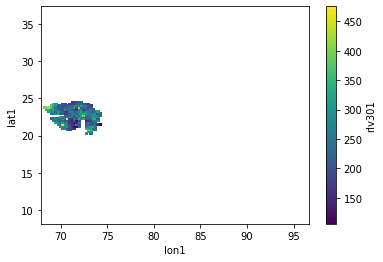

In [42]:
import matplotlib.pyplot as plt
masking1 = rl301*fld1
masking1.values = masking1.values/fld1
masking1100 = data[0]['rlv1']*fld1
masking1100.values = masking1100.values/fld1
masking1.plot()
plt.show()

In [43]:
masking2 = rl302*fld1
masking2.values = masking2.values/fld1
masking2100 = data[1]['rlv1']*fld1
masking2100.values = masking2100.values/fld1

In [44]:
masking3 = rl305*fld1
masking3.values = masking3.values/fld1
masking3100 = data[2]['rlv1']*fld1
masking3100.values = masking3100.values/fld1

In [45]:
masking5 = rl305*fld1
masking5.values = masking5.values/fld1
masking5100 = data[3]['rlv1']*fld1
masking5100.values = masking5100.values/fld1

In [46]:
m1 = masking1.values[~np.isnan(masking1.values)]
m2 = masking2.values[~np.isnan(masking2.values)]
m3 = masking3.values[~np.isnan(masking3.values)]
m5 = masking5.values[~np.isnan(masking5.values)]
m1100 = masking1100.values[~np.isnan(masking1100.values)]
m2100 = masking2100.values[~np.isnan(masking2100.values)]
m3100 = masking3100.values[~np.isnan(masking3100.values)]
m5100 = masking5100.values[~np.isnan(masking5100.values)]

In [47]:
ll=[]
for i in range(117):
    for j in range(115):
        if(np.isnan(masking1.values[i][j])== False):
            ll.append((data[0].lat1.values[i],data[0].lon1.values[j]))

In [48]:
len(ll)

262

In [54]:
len(latd)

25

In [12]:
import pandas as pd
latlon = pd.read_excel(r"D:\maharashtra districts lat lon.xlsx",sheetname='Sheet1')

C:\Users\Pranjali\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [55]:
p01=[]
for i in range(25):
    for j in range(len(ll)):
        p= (1/(np.sqrt((latd[i]-ll[j][0])**2+(lond[i]-ll[j][1])**2)))#*m0[j]
        p01.append(p)


C:\Users\Pranjali\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


In [56]:
for i in range(len(p01)):
    if(p01[i]==np.inf):
        print(i)

230


In [57]:
p01[230]=0

In [58]:
len(p01)

6550

In [59]:
sp301=0
pf=[]

for i in range(0,6550,262):
    for j in range(262):
        sp301= sp301+p01[i:i+262][j]
    pf.append(sp301)

In [60]:
s1=0
s2=0
s3=0
s4=0
s5=0
s6=0
s7=0
s8=0
s30=[]
s100=[]
for i in range(0,6550,262):
    for j in range(262):
            s1=s1+(p01[i:i+262][j]*m1[j])
            s2=s2+(p01[i:i+262][j]*m2[j])
            s3=s3+(p01[i:i+262][j]*m3[j])
            s4=s4+(p01[i:i+262][j]*m5[j])
            s5=s5+(p01[i:i+262][j]*m1100[j])
            s6=s6+(p01[i:i+262][j]*m2100[j])
            s7=s7+(p01[i:i+262][j]*m3100[j])
            s8=s8+(p01[i:i+262][j]*m5100[j])
    s30.append((s1,s2,s3,s4))
    s100.append((s5,s6,s7,s8))

In [61]:
rlf30=[]
for i in range(len(s30)):
    rlf30.append((s30[i][0]/pf[i],s30[i][1]/pf[i],s30[i][2]/pf[i],s30[i][3]/pf[i]))

In [62]:
rlf100=[]
for i in range(len(s100)):
    rlf100.append((s100[i][0]/pf[i],s100[i][1]/pf[i],s100[i][2]/pf[i],s100[i][3]/pf[i]))

In [63]:
rlratio1 = []
rlratio2 = []
rlratio3 = []
rlratio5 = []
for i in range(len(s100)):
    rlratio1.append(rlf30[i][0]/rlf100[i][0])
    rlratio2.append(rlf30[i][1]/rlf100[i][1])
    rlratio3.append(rlf30[i][2]/rlf100[i][2])
    rlratio5.append(rlf30[i][3]/rlf100[i][3])

In [64]:
rl1ind =[]
rl2ind=[]
rl3ind=[]
rl5ind=[]
for i in range(len(rlratio1)):
    rl1ind.append((rlratio1[i]-min(rlratio1))/(max(rlratio1)-min(rlratio1)))
    rl2ind.append((rlratio2[i]-min(rlratio2))/(max(rlratio2)-min(rlratio2)))
    rl3ind.append((rlratio3[i]-min(rlratio3))/(max(rlratio3)-min(rlratio3)))
    rl5ind.append((rlratio5[i]-min(rlratio5))/(max(rlratio5)-min(rlratio5)))

In [65]:
import pandas as pd
df= pd.DataFrame({'r100':rlf100,'r30':rlf30,'r1index':rl1ind,'r2index':rl2ind,'r3index':rl3ind,'r5index':rl5ind})
import openpyxl
df.to_excel( r"D:\rlindex-1970-2001-pb.xlsx")